In [2]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

import tqdm

In [3]:
# Model
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
fullbody_cascade = cv2.CascadeClassifier("haarcascade_fullbody.xml")

In [4]:
# Face detection function

def detect_face(img):
    
    face_img = img
  
    # .detectMultiScale() retorna las posiciones de las esquinas de un rectangulo
    face_rects = face_cascade.detectMultiScale(image = face_img, scaleFactor = 1.1, minNeighbors = 5)
    
    number_of_faces = len(face_rects)
    
    for x, y, w, h in face_rects: #x_inicio, y_inicio, w_ancho y h_alto
        
        cv2.rectangle(img = face_img,
                      pt1 = (x, y),
                      pt2 = (x + w, y + h),
                      color = (57, 255, 20),
                      thickness = 3) 
        
    return face_img, number_of_faces

In [5]:
# Body detection function

def detect_body(img):
    
    body_img = img.copy()
  
    # .detectMultiScale() retorna las posiciones de las esquinas de un rectangulo
    body_rects = fullbody_cascade.detectMultiScale(image = body_img, scaleFactor = 1.1, minNeighbors = 1)
    
    num_person = len(body_rects)
    
    for x, y, w, h in body_rects: #x_inicio, y_inicio, w_ancho y h_alto
        
        cv2.rectangle(img = body_img,
                      pt1 = (x, y),
                      pt2 = (x + w, y + h),
                      color = (57, 255, 20),
                      thickness = 3) 
        
    return body_img, num_person

In [6]:
# Text function

def put_text(image, text, x_inicio = 350, y_inicio = 0, largo = 500, ancho = 100, color_text = (57, 255, 20), color_back = (0,0,0)):
    
    cv2.rectangle(image, (x_inicio, y_inicio), (x_inicio+largo, y_inicio+ancho), color_back, -1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img = image, text = texto, org = (x_inicio+75, y_inicio + 60), fontFace = font, fontScale = 1, color = color_text, thickness = 1, lineType = cv2.LINE_AA)
    
    return image

## Modificación de video- Detección de rostros

In [59]:
cap = cv2.VideoCapture('Data/london_walk.mp4')

# Propiedades:
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)

# Configuramos escritura de video:
video_writer = cv2.VideoWriter("london_walk_face_detection.avi", cv2.VideoWriter_fourcc('M','J','P','G'), fps, (width, height))




for frame_idx in tqdm.tqdm(range(int(num_frames))):
    
    # Vamos a leer cada uno de los frames:
    ret, frame = cap.read()
    
    
    # Transformaciones:
    frame_faces, number_of_faces = detect_face(frame)
    texto = f"Caras detectadas: {number_of_faces}"
    frame_faces_detected = put_text(frame_faces, texto)    
    
    # Visualizamos imagen:
    #cv2.imshow('Frame',frame_faces_detected)
    
    # Guardamos frame:
    video_writer.write(frame_faces_detected)
    
    # Press q on keyboard to stop the loop
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
    if frame_idx == 2000:
        break

# Paramos video
cap.release() 

# Cerramos frames
cv2.destroyAllWindows()

# Cerramos escritura de video:
video_writer.release() 

  8%|▊         | 2000/24525 [06:29<1:13:05,  5.14it/s]


## Resultado

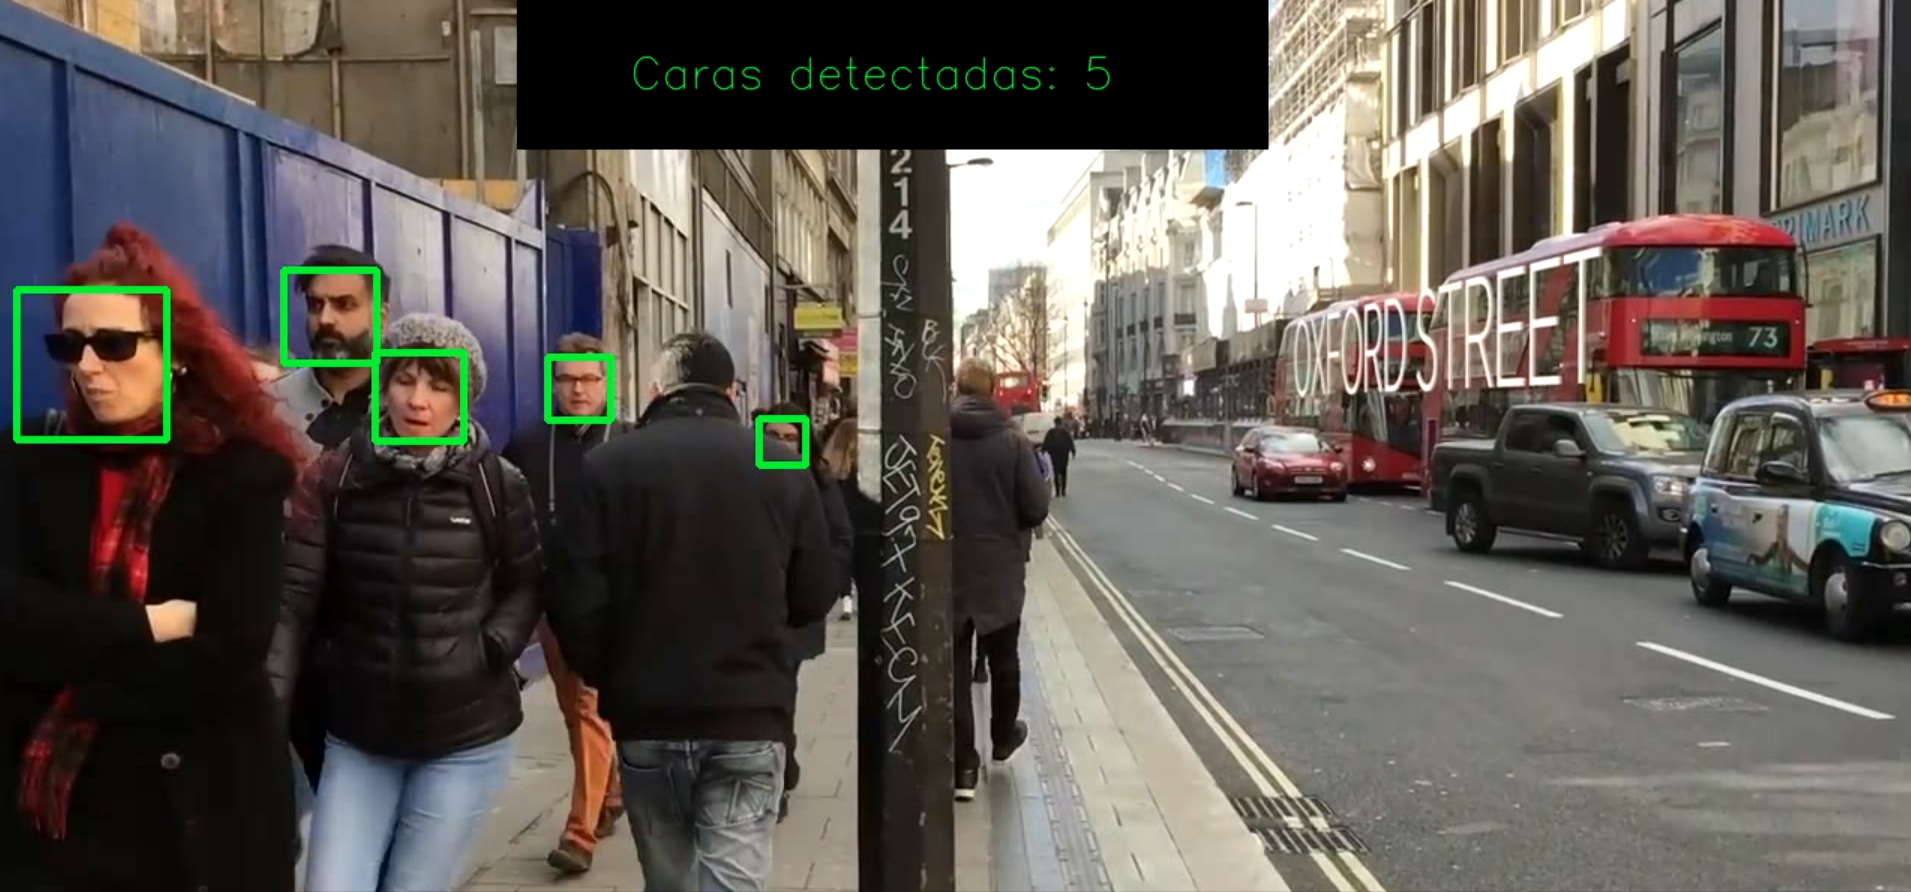